In [57]:
### Logisitic Regression for multiclass classification.
### Digit classification based on 8x8 images from the digit data set from scikit learn

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [7]:
digits = datasets.load_digits()
print(dir(digits))
digits.data[0]  # 1st image out of 1797 images
# 64 vals in the array ---> 64 dimensional feature vector for 1 sample

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

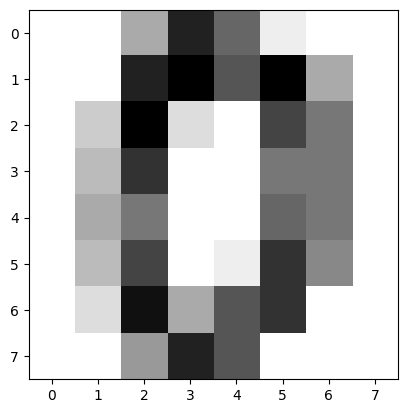

In [10]:
# visualizing the first image in the dataset

plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

<Figure size 640x480 with 0 Axes>

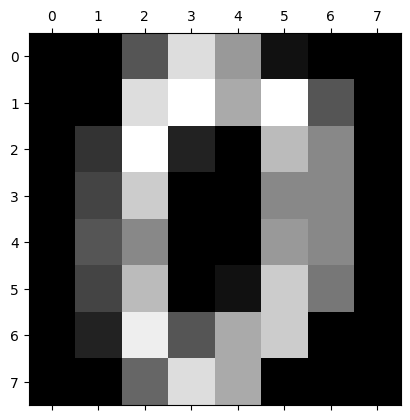

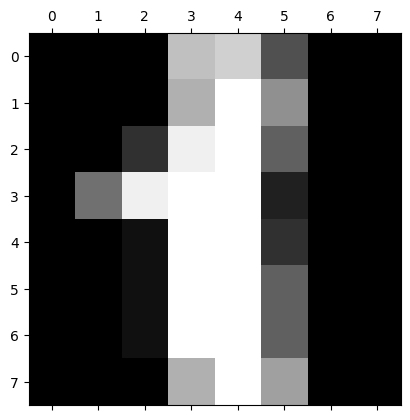

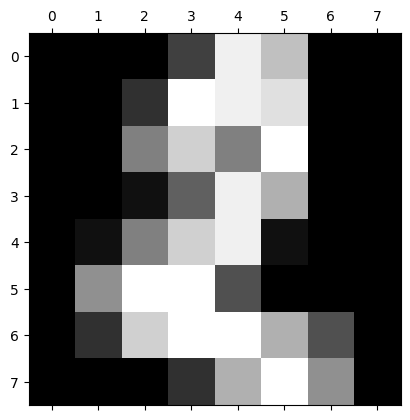

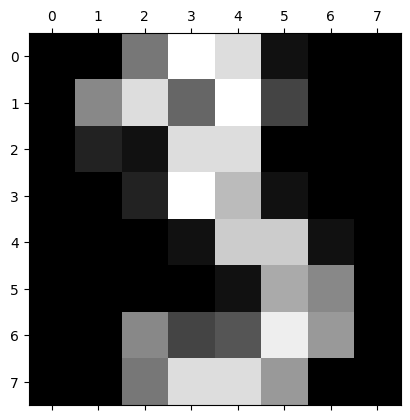

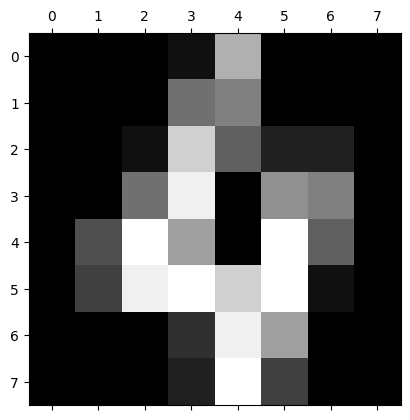

In [11]:
# printing first 5 images in the data set

plt.gray()
for i in range(5):
    plt.matshow(digits.images[i]) # 

In [12]:
# the digits list also contains target ---> these are the labels for all images
# printing the target for the first 5 images

digits.target[0:5] # list labels associated with first 5 images

array([0, 1, 2, 3, 4])

In [28]:
# we use data(X) and targe(y) to train the model

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training Samples: ",len(X_train)) # 70%
print("Testing Samples: ",len(X_test))   # 30%

Training Samples:  1257
Testing Samples:  540


In [29]:
model = LogisticRegression(max_iter=500)

model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [31]:
model.score(X_test, y_test) # 96.85% accuracy in the model

0.9685185185185186

<Figure size 640x480 with 0 Axes>

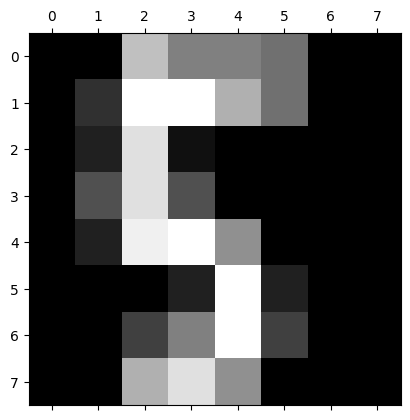


Predicted Number: [5]



In [46]:
# random predictions

prediction = model.predict([digits.data[25]])

plt.gray()
plt.matshow(digits.images[25])
plt.show()

print("\nPredicted Number: {}\n".format(prediction))

In [50]:
model.predict(digits.data[0:5]) # same as seen when exploring data

array([0, 1, 2, 3, 4])

In [56]:
# confusion matrix

y_predicted = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_predicted)
conf_matrix

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  1,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 52,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 58,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 63,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 53,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 42,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  2, 56]])

Text(50.722222222222214, 0.5, 'True y')

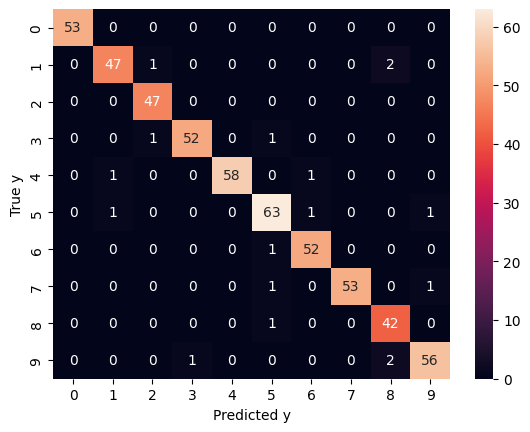

In [60]:
sns.heatmap(conf_matrix, annot=True)
plt.xlabel("Predicted y")
plt.ylabel("True y")

# most wrong predictions were: predicted 8 ---> truth was 9,1 